In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy.signal import savgol_filter
from scipy.misc import derivative

filename = "IMG-20230412-WA0004.jpg"

im = cv2.imread(filename)

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

im_gray = np.array(Image.open(filename).convert('L'))

In [3]:
im_gray = np.rot90(im_gray)

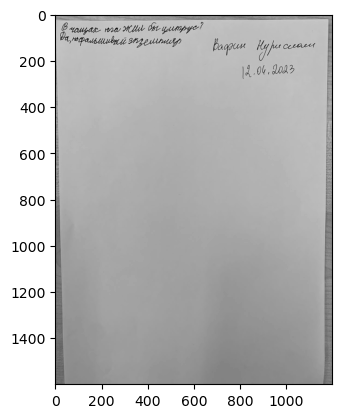

In [4]:
plt.imshow(im_gray)
plt.gray()
plt.show()

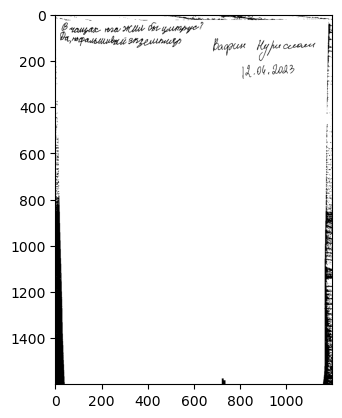

In [5]:
maxval = 255
thresh = 128

im_bin = (im_gray > thresh) * maxval
plt.imshow(im_bin)
plt.gray()
plt.show()

In [6]:
def dfs(matrix, visited, i, j, points):
    # Mark the current cell as visited
    visited[i][j] = 1
    points.append((i, j))
    # Check the neighboring cells
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]):
                if matrix[x][y] == 0 and visited[x][y] == 0:
                    dfs(matrix, visited, x, y, points)

def get_outers(matrix):
    visited = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] == 0:
                if i == 0 or j == 0 or i == matrix.shape[0] - 1 or j == matrix.shape[1] - 1:
                    visited[i][j] = 0
                else:
                    visited[i][j] = 255
                continue
            if i + 1 < matrix.shape[0] and matrix[i+1][j] == 0:
                visited[i][j] = 0
            elif j + 1 < matrix.shape[1] and matrix[i][j+1] == 0:
                visited[i][j] = 0
            elif j - 1 >= 0 and matrix[i][j-1] == 0:
                visited[i][j] = 0
            elif i - 1 >= 0 and matrix[i-1][j] == 0:
                visited[i][j] = 0
            else:
                visited[i][j] = 255
    return visited
        
                    
def get_lines(matrix):
    points_arr = []
    matrix2 = get_outers(matrix)
    visited = np.zeros_like(matrix2)
    for i in range(matrix2.shape[0]):
        for j in range(matrix2.shape[1]):
            if visited[i, j] == 0 and matrix2[i, j] == 0:
                points = []
                dfs(matrix2, visited, i, j, points)
                points_arr.append(points)
    return points_arr

def curvature(x, y):
    """Calculate the curvature of a 2D curve"""
    dx_dt = savgol_filter(x, window_length=15, polyorder=2, deriv=1)
    dy_dt = savgol_filter(y, window_length=15, polyorder=2, deriv=1)
    d2x_dt2 = savgol_filter(x, window_length=15, polyorder=2, deriv=2)
    d2y_dt2 = savgol_filter(y, window_length=15, polyorder=2, deriv=2)
    numerator = dx_dt * d2y_dt2 - d2x_dt2 * dy_dt
    denominator = (dx_dt ** 2 + dy_dt ** 2) ** (3/2)
    return numerator / denominator

def get_curvature(matrix):
    points_arr = get_lines(matrix)
    for i in range(len(points_arr)):
        points_arr[i] = points_arr[i][:-8]
    curvatures = np.array([])
    for points in points_arr:
        if len(points) == 0:
            continue
        x, y = zip(*points)
        if len(x) <= 15:
            continue
        x = np.array(x)
        y = np.array(y)
        x = x - np.min(x)
        y = y - np.min(y)
        max_x = np.max(x)
        max_y = np.max(y)
        curv = curvature(x/max(max_x, max_y), y/max(max_x, max_y))
        curvatures = np.concatenate((curvatures, curv))
    return curvatures
        

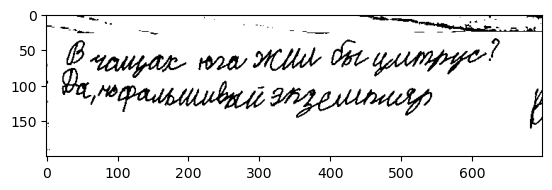

In [7]:
plt.imshow(im_bin[:200, :700])

In [8]:
letters_curvature = dict()

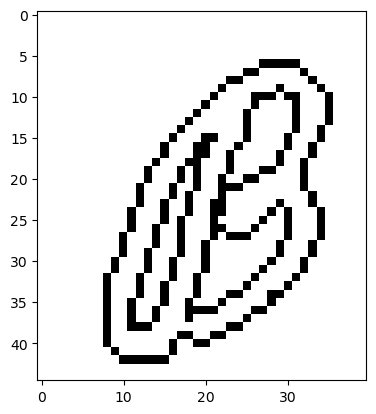

In [11]:
v = im_bin[30:75, 20:60]
plt.imshow(get_outers(v))
plt.gray()
plt.show()

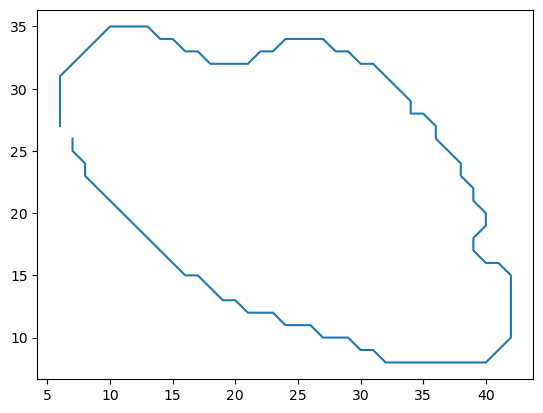

In [12]:
x, y = zip(*get_lines(v)[0])
plt.plot(x, y)

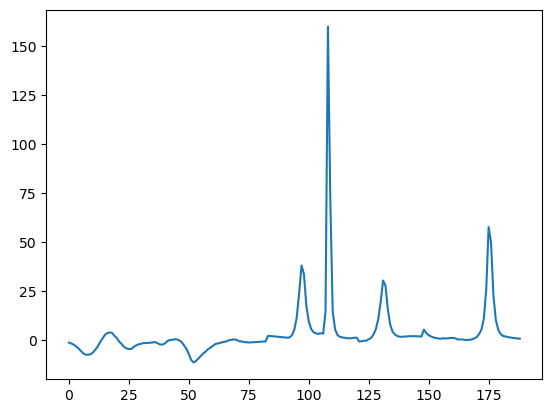

In [13]:
letters_curvature['v'] = get_curvature(v)
plt.plot(get_curvature(v))

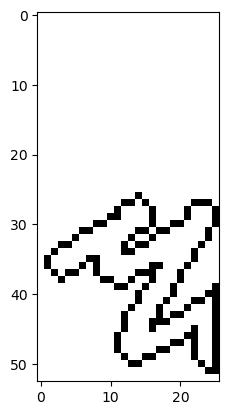

In [19]:
ch = im_bin[30:83, 60:86]
plt.imshow(get_outers(ch))
plt.gray()
plt.show()

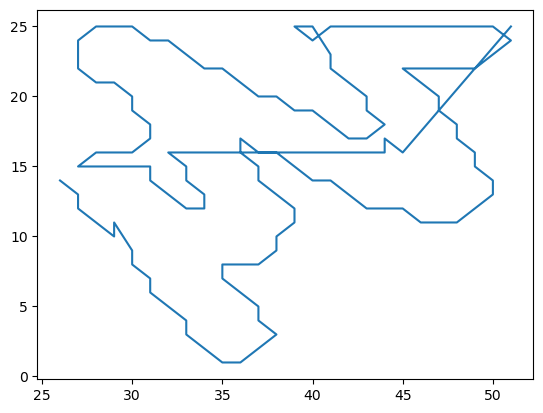

In [20]:
x, y = zip(*get_lines(ch)[0])
plt.plot(x, y)

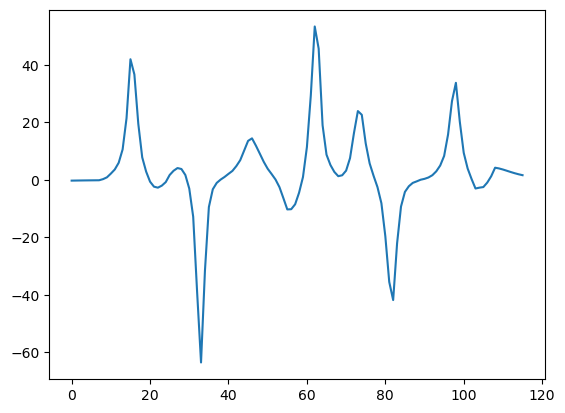

In [21]:
letters_curvature['ch'] = get_curvature(ch)
plt.plot(get_curvature(ch))

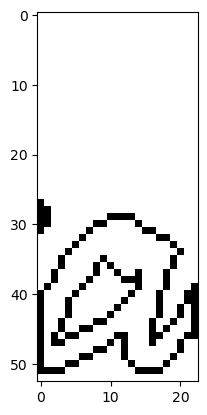

In [27]:
a = im_bin[30:83, 84:107]
plt.imshow(get_outers(a))
plt.gray()
plt.show()

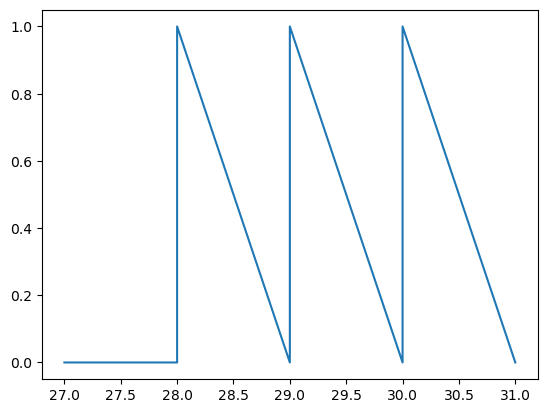

In [28]:
x, y = zip(*get_lines(a)[0])
plt.plot(x, y)

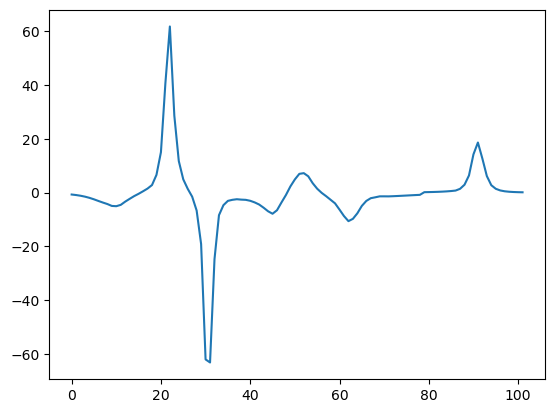

In [29]:
letters_curvature['a'] = get_curvature(a)
plt.plot(get_curvature(a))

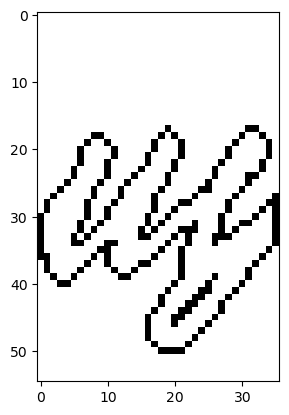

In [38]:
sha = im_bin[40:95, 105:141]
plt.imshow(get_outers(sha))
plt.gray()
plt.show()

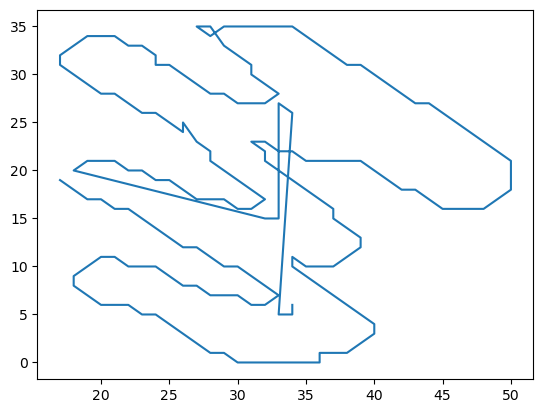

In [39]:
x, y = zip(*get_lines(sha)[0])
plt.plot(x, y)

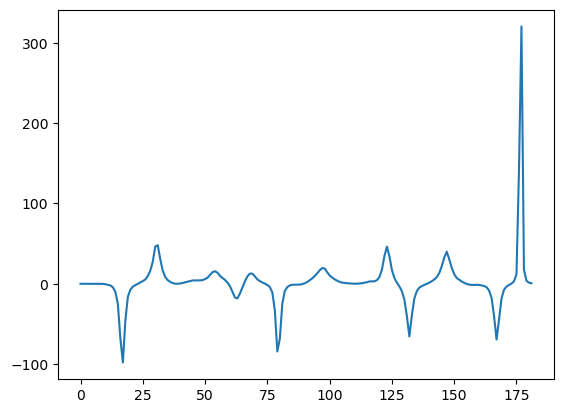

In [40]:
letters_curvature['sha'] = get_curvature(sha)
plt.plot(get_curvature(sha))

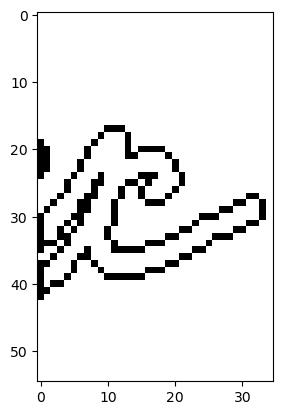

In [43]:
h = im_bin[40:95, 165:200]
plt.imshow(get_outers(h))
plt.gray()
plt.show()

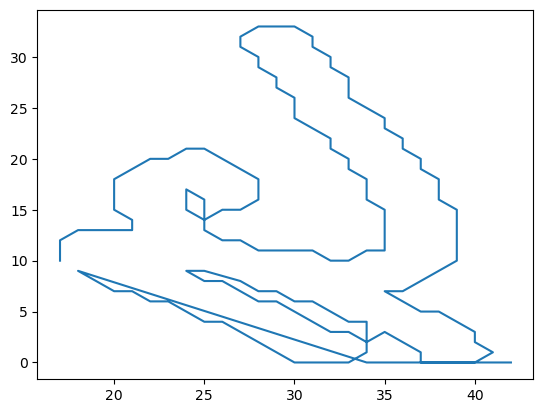

In [44]:
x, y = zip(*get_lines(h)[0])
plt.plot(x, y)

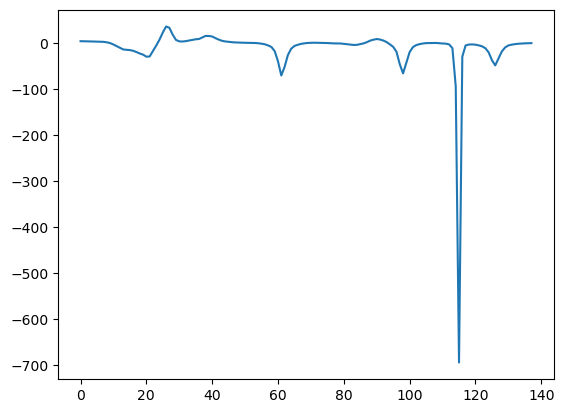

In [45]:
letters_curvature['h'] = get_curvature(h)
plt.plot(get_curvature(h))

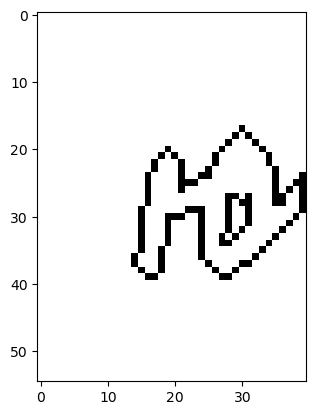

In [47]:
u = im_bin[40:95, 200:240]
plt.imshow(get_outers(u))
plt.gray()
plt.show()

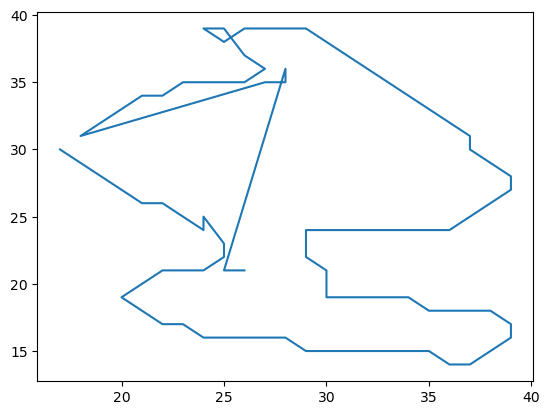

In [48]:
x, y = zip(*get_lines(u)[0])
plt.plot(x, y)

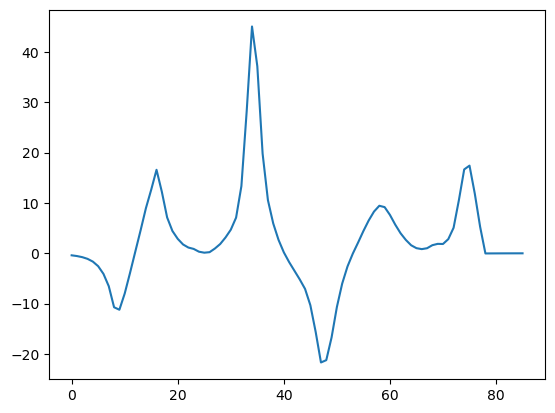

In [49]:
letters_curvature['u'] = get_curvature(u)
plt.plot(get_curvature(u))

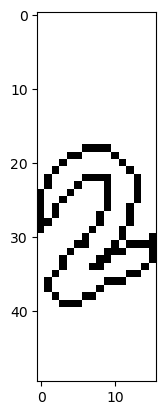

In [53]:
g = im_bin[40:90, 239:255]
plt.imshow(get_outers(g))
plt.gray()
plt.show()

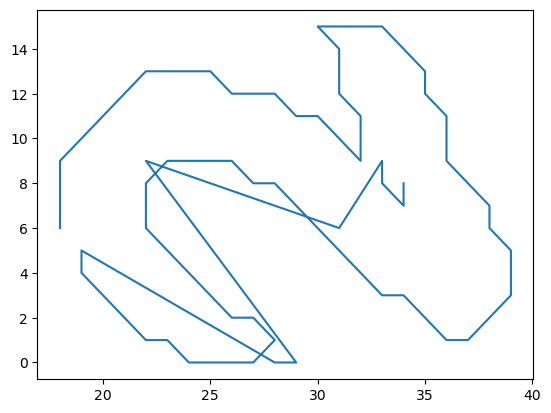

In [54]:
x, y = zip(*get_lines(g)[0])
plt.plot(x, y)

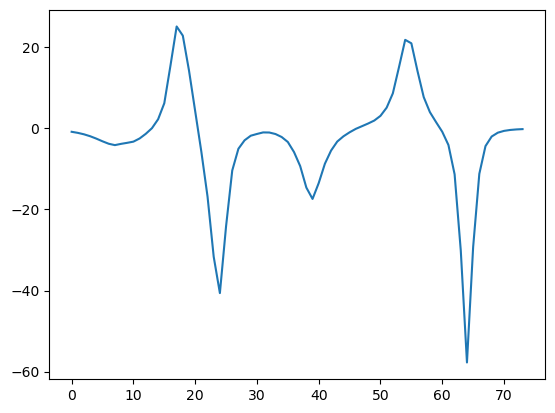

In [55]:
letters_curvature['g'] = get_curvature(g)
plt.plot(get_curvature(g))

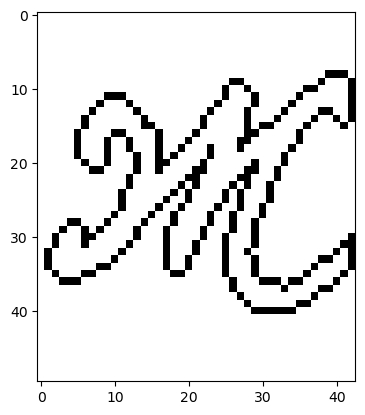

In [62]:
zh = im_bin[40:90, 290:333]
plt.imshow(get_outers(zh))
plt.gray()
plt.show()

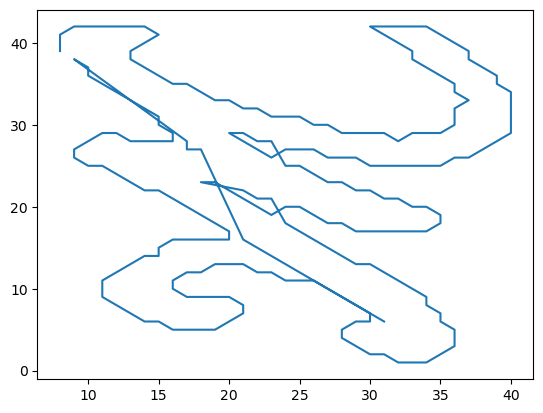

In [63]:
x, y = zip(*get_lines(zh)[0])
plt.plot(x, y)

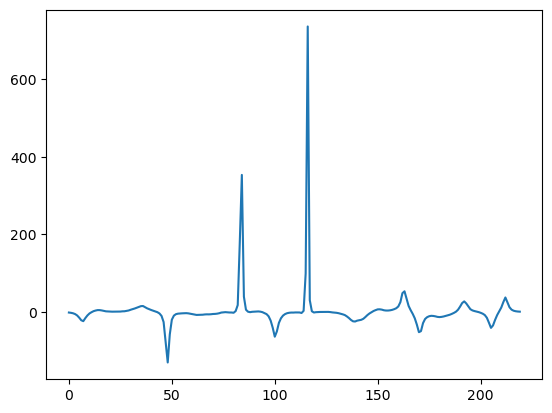

In [64]:
letters_curvature['zh'] = get_curvature(zh)
plt.plot(get_curvature(zh))

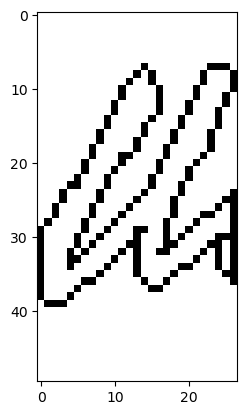

In [68]:
i = im_bin[40:90, 333:360]
plt.imshow(get_outers(i))
plt.gray()
plt.show()

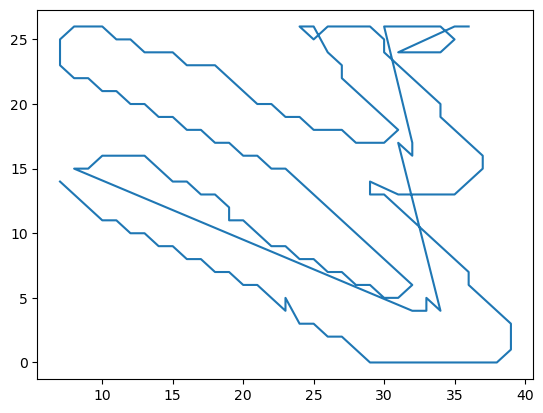

In [69]:
x, y = zip(*get_lines(i)[0])
plt.plot(x, y)

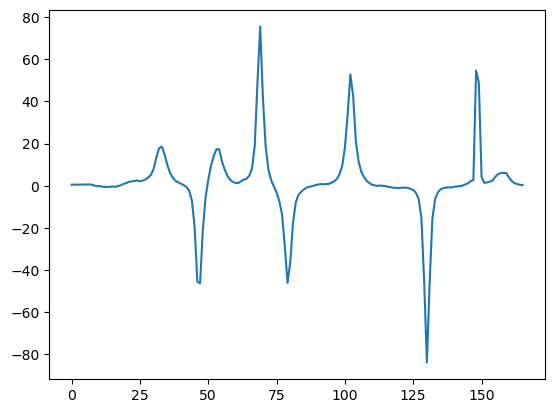

In [70]:
letters_curvature['i'] = get_curvature(i)
plt.plot(get_curvature(i))

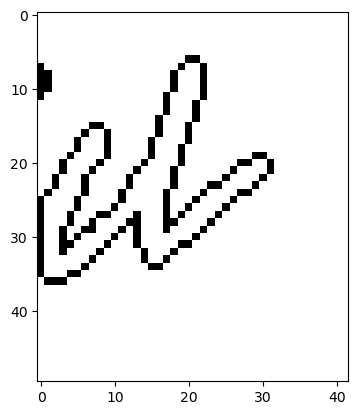

In [72]:
l = im_bin[40:90, 358:400]
plt.imshow(get_outers(l))
plt.gray()
plt.show()

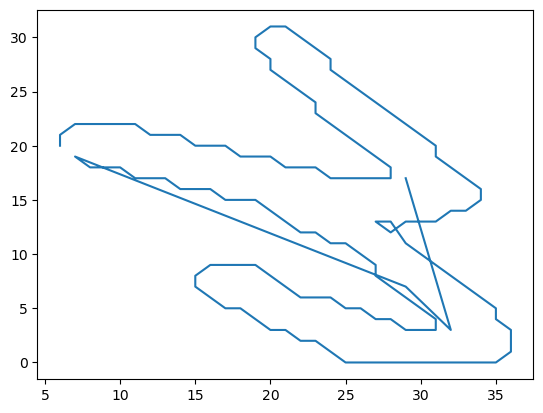

In [73]:
x, y = zip(*get_lines(l)[0])
plt.plot(x, y)

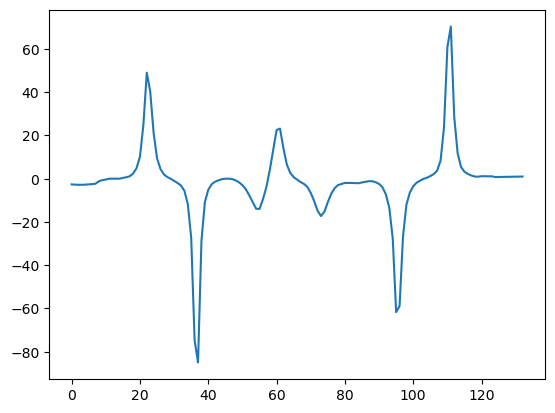

In [74]:
letters_curvature['l'] = get_curvature(l)
plt.plot(get_curvature(l))

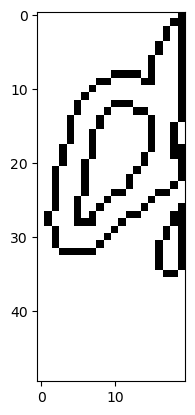

In [77]:
b = im_bin[40:90, 400:420]
plt.imshow(get_outers(b))
plt.gray()
plt.show()

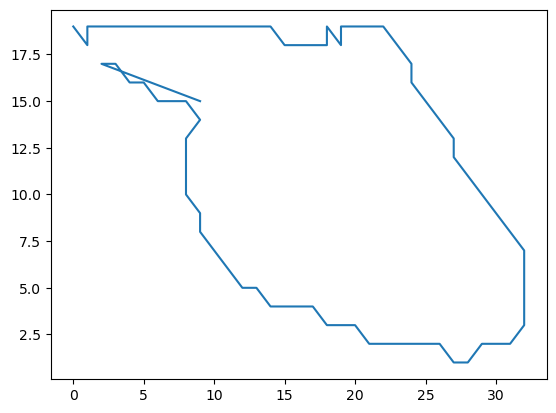

In [78]:
x, y = zip(*get_lines(b)[0])
plt.plot(x, y)

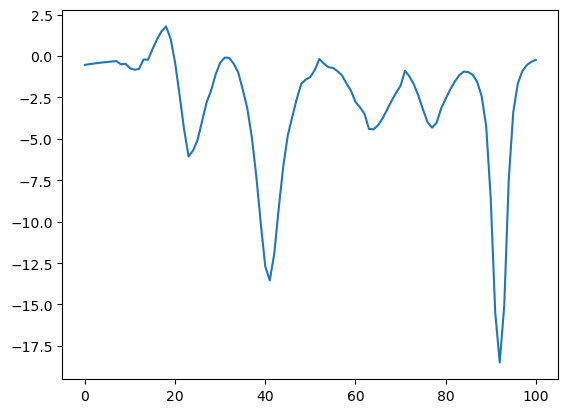

In [79]:
letters_curvature['b'] = get_curvature(b)
plt.plot(get_curvature(b))

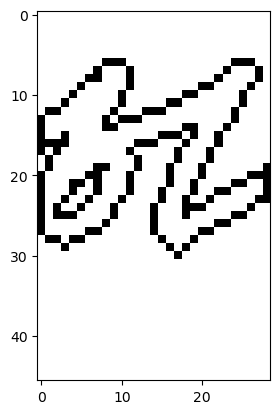

In [86]:
bl = im_bin[44:90, 420:449]
plt.imshow(get_outers(bl))
plt.gray()
plt.show()

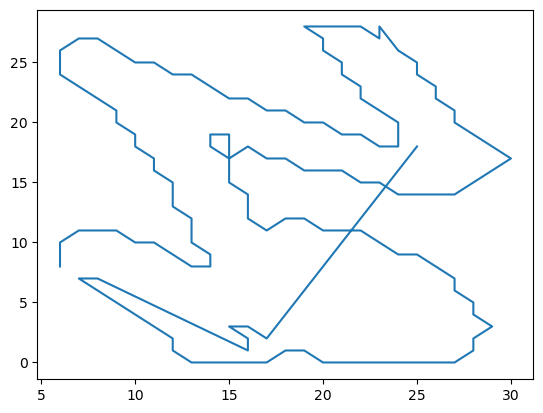

In [87]:
x, y = zip(*get_lines(bl)[0])
plt.plot(x, y)

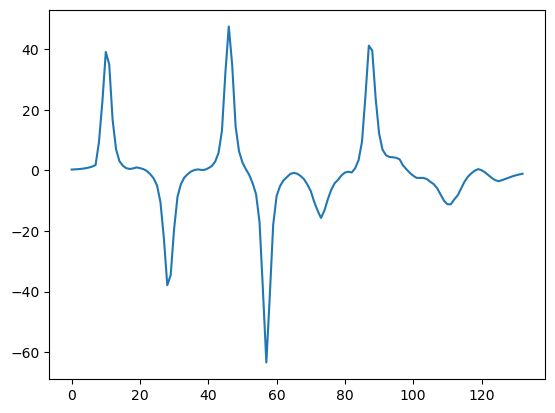

In [88]:
letters_curvature['bl'] = get_curvature(bl)
plt.plot(get_curvature(bl))

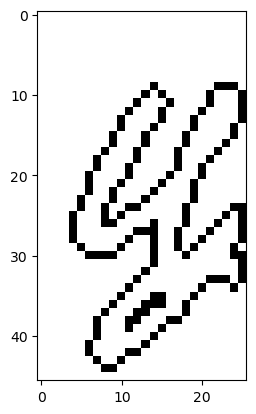

In [94]:
c = im_bin[44:90, 456:482]
plt.imshow(get_outers(c))
plt.gray()
plt.show()

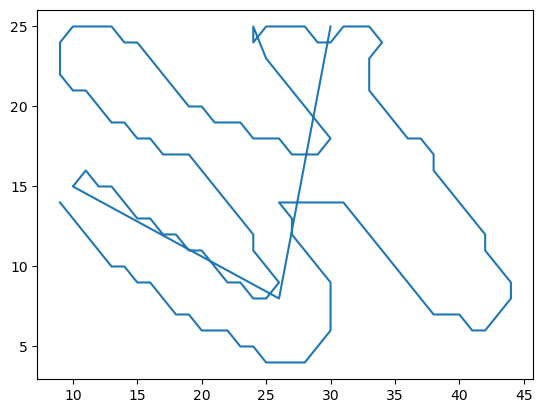

In [95]:
x, y = zip(*get_lines(c)[0])
plt.plot(x, y)

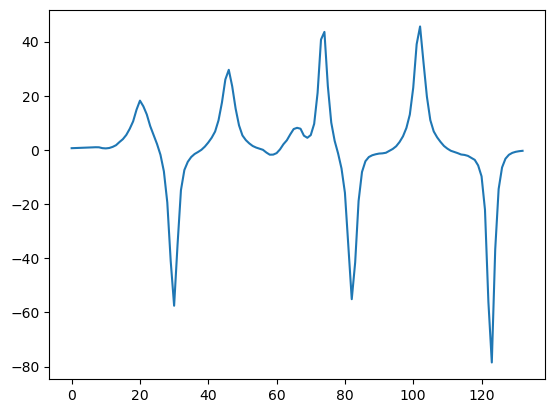

In [96]:
letters_curvature['c'] = get_curvature(c)
plt.plot(get_curvature(c))

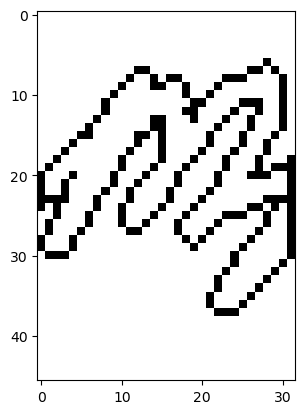

In [106]:
t = im_bin[44:90, 516:548]
plt.imshow(get_outers(t))
plt.gray()
plt.show()

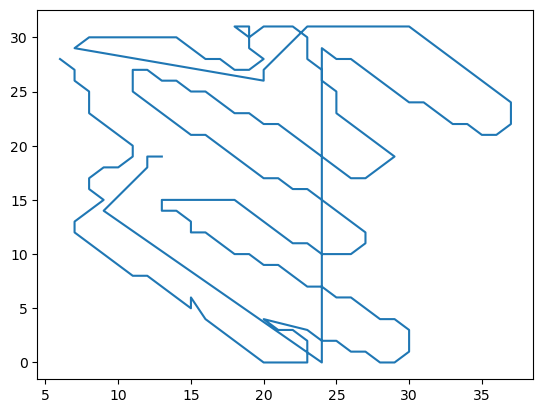

In [107]:
x, y = zip(*get_lines(t)[0])
plt.plot(x, y)

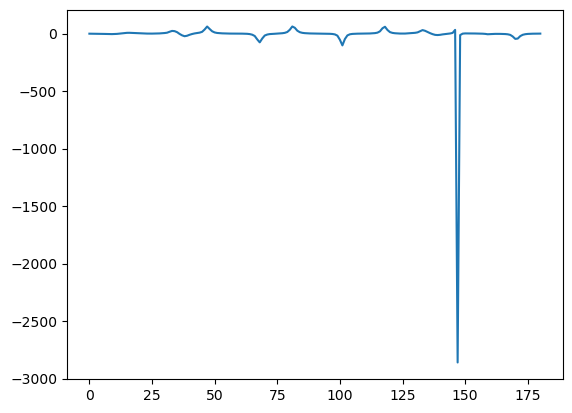

In [108]:
letters_curvature['t'] = get_curvature(t)
plt.plot(get_curvature(t))

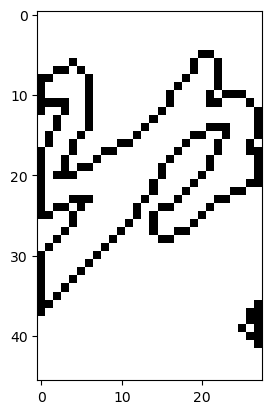

In [116]:
r = im_bin[44:90, 540:568]
plt.imshow(get_outers(r))
plt.gray()
plt.show()

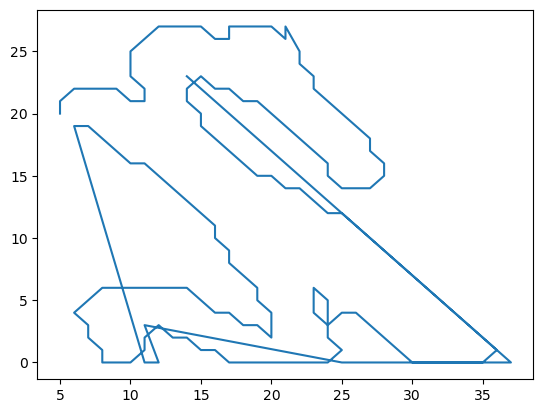

In [117]:
x, y = zip(*get_lines(r)[0])
plt.plot(x, y)

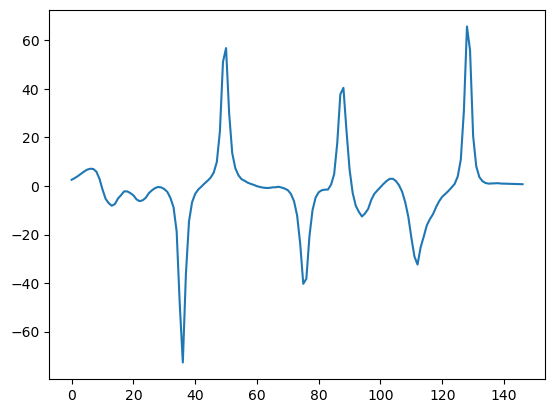

In [118]:
letters_curvature['r'] = get_curvature(r)
plt.plot(get_curvature(r))

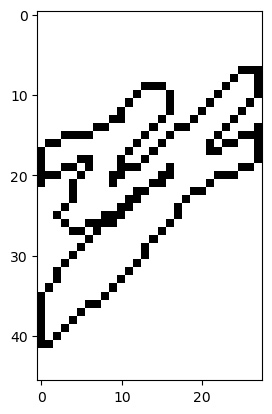

In [122]:
y = im_bin[44:90, 567:595]
plt.imshow(get_outers(y))
plt.gray()
plt.show()

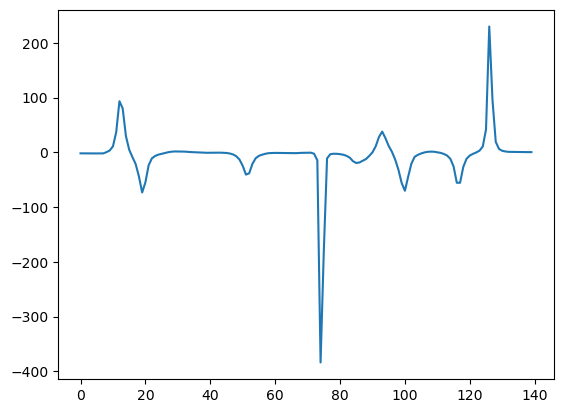

In [123]:
letters_curvature['y'] = get_curvature(y)
plt.plot(get_curvature(y))

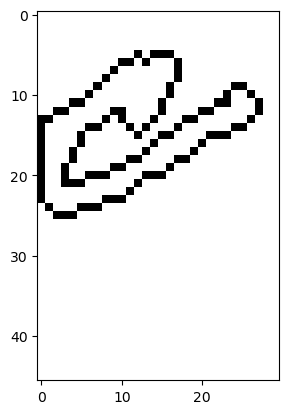

In [126]:
s = im_bin[44:90, 595:625]
plt.imshow(get_outers(s))
plt.gray()
plt.show()

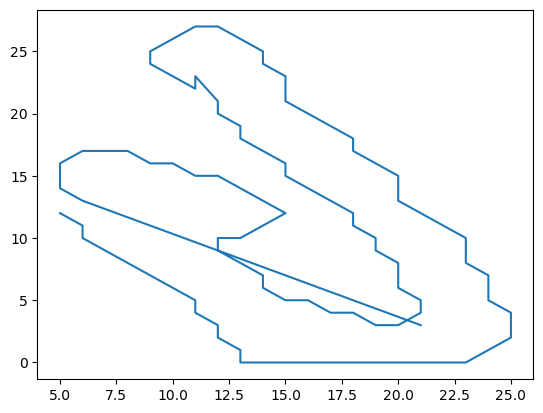

In [127]:
x, y = zip(*get_lines(s)[0])
plt.plot(x, y)

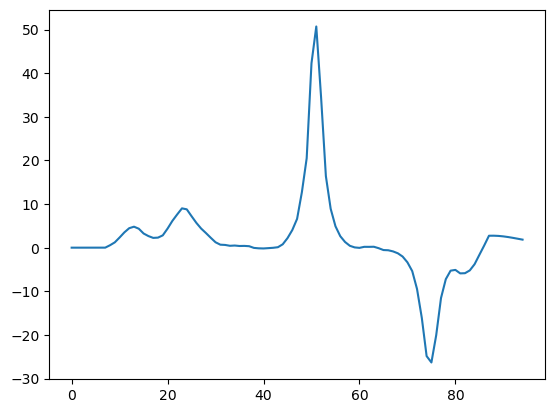

In [128]:
letters_curvature['s'] = get_curvature(s)
plt.plot(get_curvature(s))

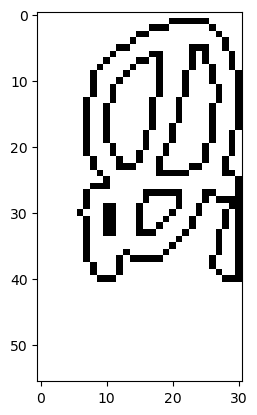

In [138]:
d = im_bin[74:130, 15:46]
plt.imshow(get_outers(d))
plt.gray()
plt.show()

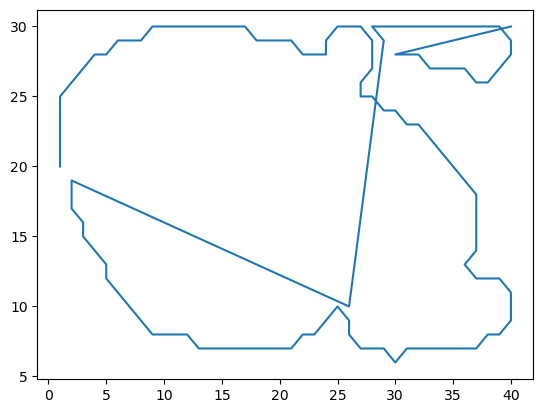

In [139]:
x, y = zip(*get_lines(d)[0])
plt.plot(x, y)

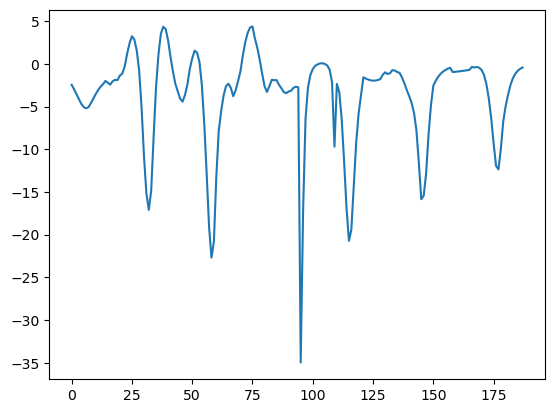

In [140]:
letters_curvature['d'] = get_curvature(d)
plt.plot(get_curvature(d))

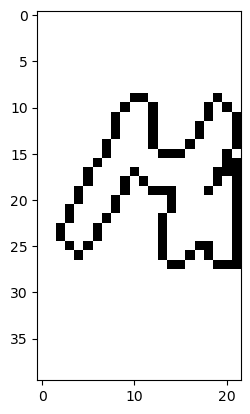

In [146]:
n = im_bin[90:130, 70:92]
plt.imshow(get_outers(n))
plt.gray()
plt.show()

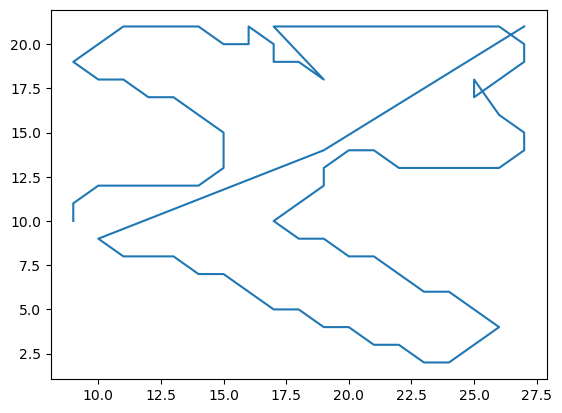

In [147]:
x, y = zip(*get_lines(n)[0])
plt.plot(x, y)

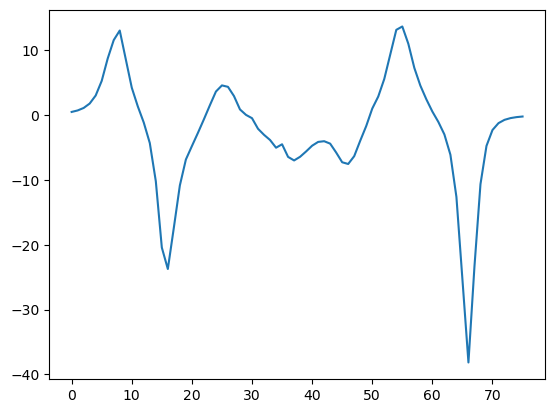

In [148]:
letters_curvature['n'] = get_curvature(n)
plt.plot(get_curvature(n))

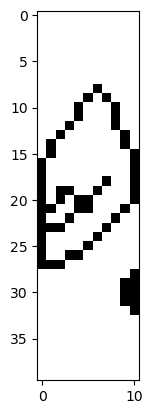

In [153]:
o = im_bin[90:130, 91:102]
plt.imshow(get_outers(o))
plt.gray()
plt.show()

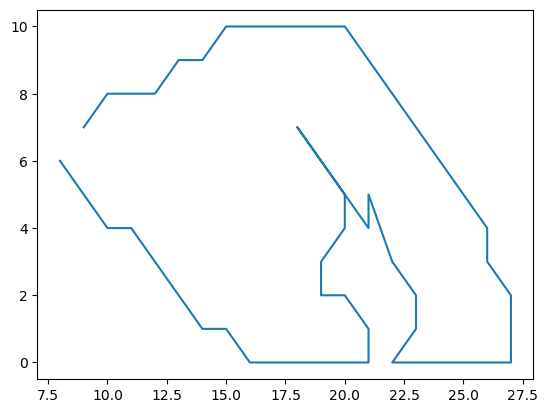

In [154]:
x, y = zip(*get_lines(o)[0])
plt.plot(x, y)

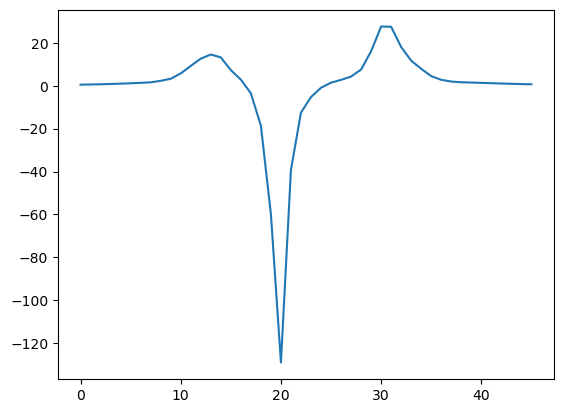

In [155]:
letters_curvature['o'] = get_curvature(o)
plt.plot(get_curvature(o))

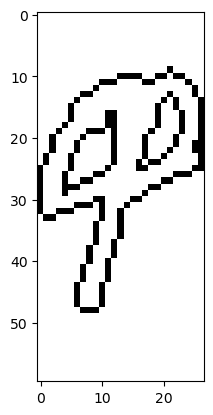

In [161]:
ph = im_bin[90:150, 101:128]
plt.imshow(get_outers(ph))
plt.gray()
plt.show()

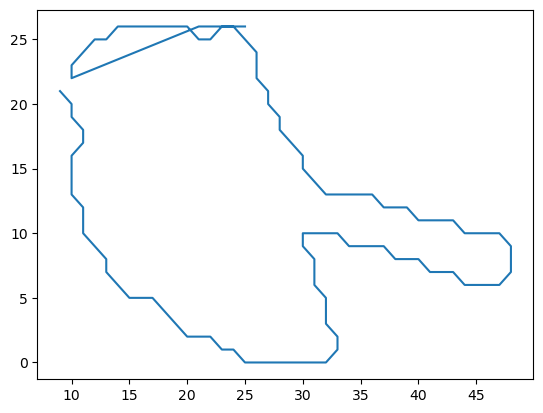

In [162]:
x, y = zip(*get_lines(ph)[0])
plt.plot(x, y)

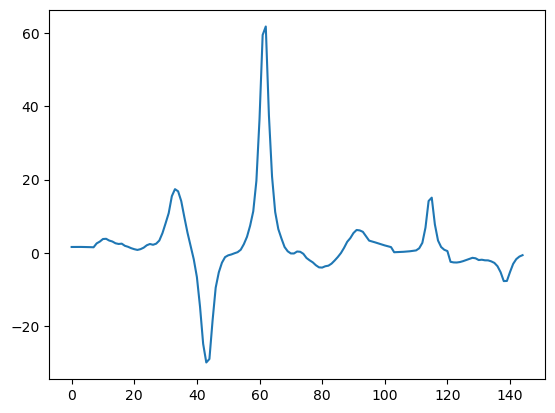

In [163]:
letters_curvature['ph'] = get_curvature(ph)
plt.plot(get_curvature(ph))

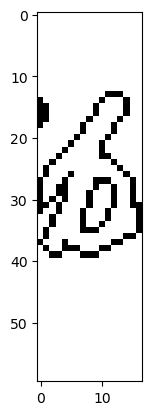

In [170]:
myagk = im_binph = im_bin[90:150, 166:183]
plt.imshow(get_outers(myagk))
plt.gray()
plt.show()

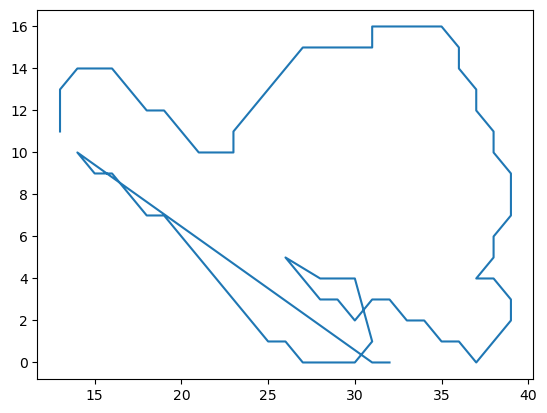

In [171]:
x, y = zip(*get_lines(myagk)[0])
plt.plot(x, y)

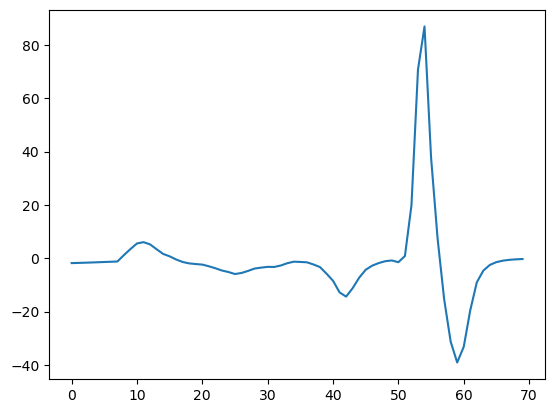

In [172]:
letters_curvature['myagk'] = get_curvature(myagk)
plt.plot(get_curvature(myagk))

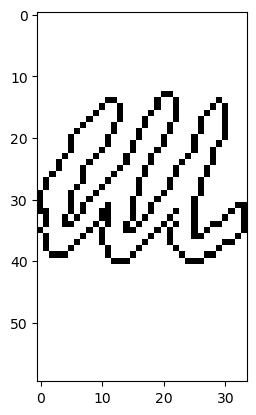

In [175]:
sh = im_bin[90:150, 186:220]
plt.imshow(get_outers(sh))
plt.gray()
plt.show()

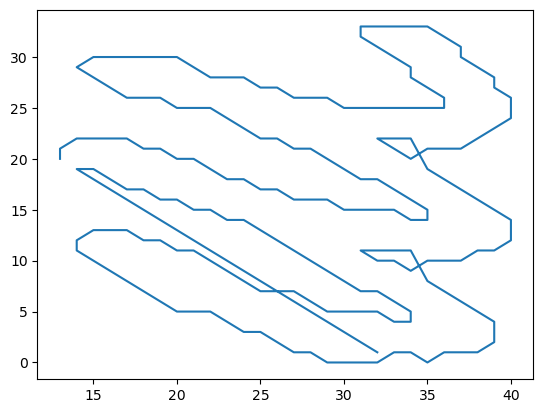

In [176]:
x, y = zip(*get_lines(sh)[0])
plt.plot(x, y)

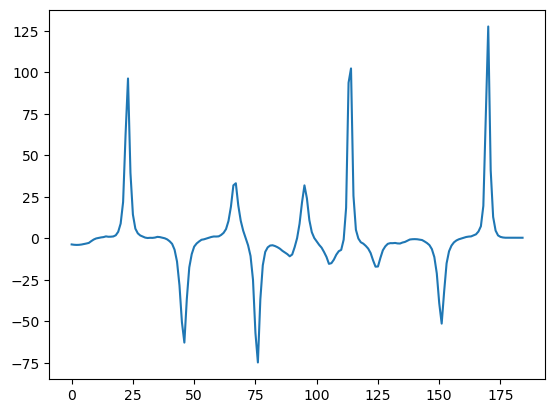

In [177]:
letters_curvature['sh'] = get_curvature(sh)
plt.plot(get_curvature(sh))

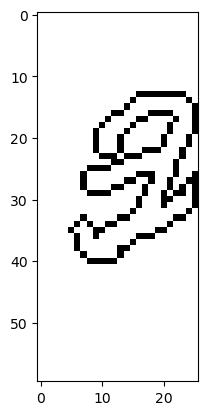

In [183]:
e = im_bin[90:150, 310:336]
plt.imshow(get_outers(e))
plt.gray()
plt.show()

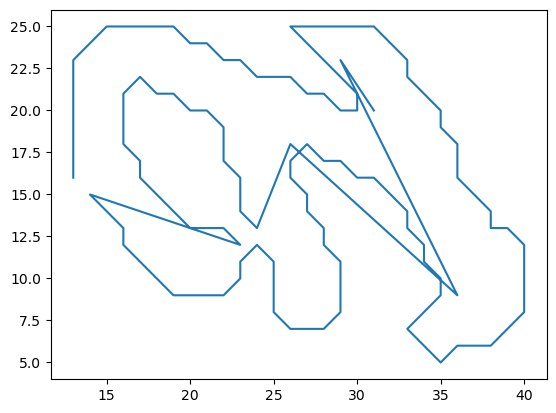

In [184]:
x, y = zip(*get_lines(e)[0])
plt.plot(x, y)

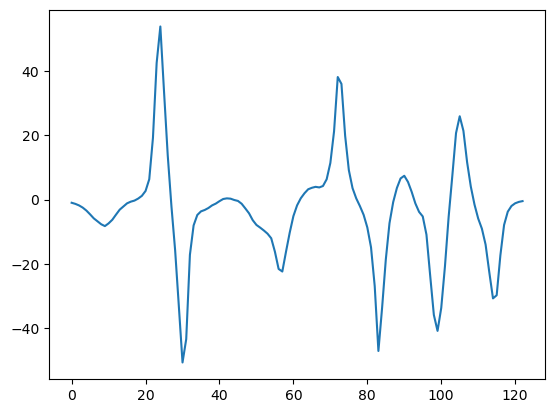

In [185]:
letters_curvature['e'] = get_curvature(e)
plt.plot(get_curvature(e))

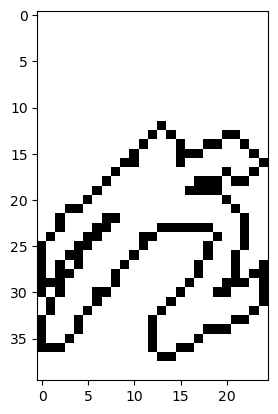

In [190]:
k = im_bin[90:130, 336:361]
plt.imshow(get_outers(k))
plt.gray()
plt.show()

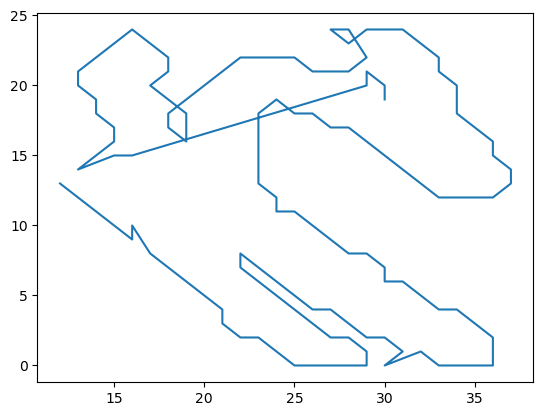

In [191]:
x, y = zip(*get_lines(k)[0])
plt.plot(x, y)

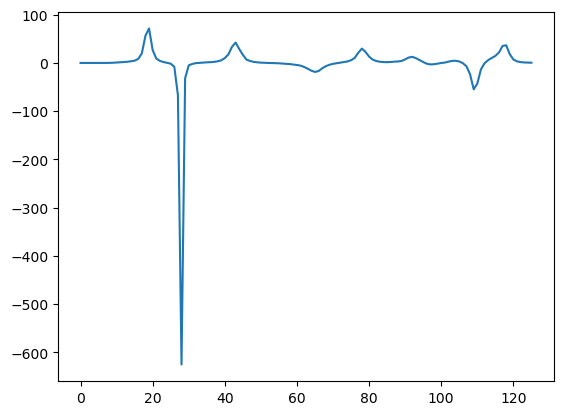

In [192]:
letters_curvature['k'] = get_curvature(k)
plt.plot(get_curvature(k))

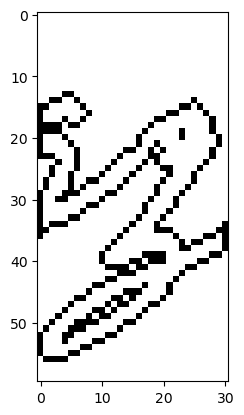

In [199]:
z = im_bin[90:150, 352:383]
plt.imshow(get_outers(z))
plt.gray()
plt.show()

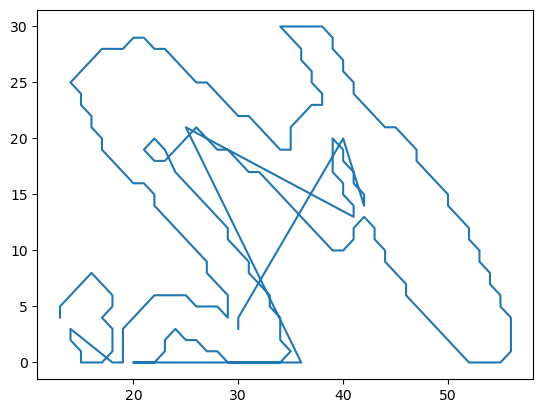

In [200]:
x, y = zip(*get_lines(z)[0])
plt.plot(x, y)

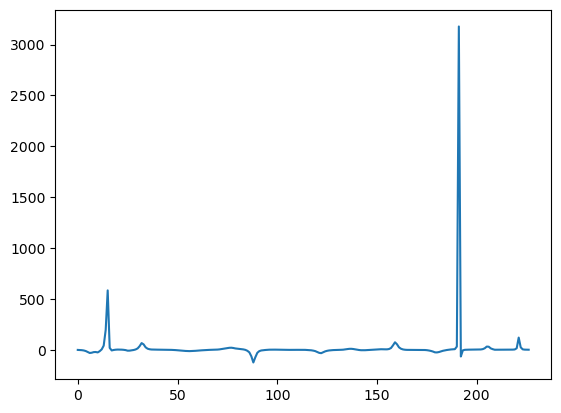

In [201]:
letters_curvature['z'] = get_curvature(z)
plt.plot(get_curvature(z))

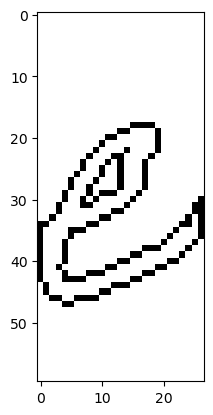

In [205]:
ye = im_bin[90:150, 383:410]
plt.imshow(get_outers(ye))
plt.gray()
plt.show()

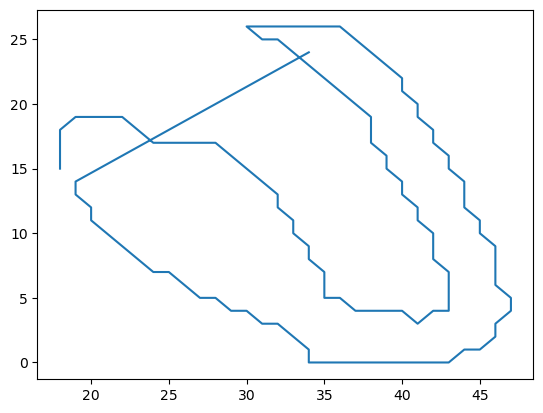

In [206]:
x, y = zip(*get_lines(ye)[0])
plt.plot(x, y)

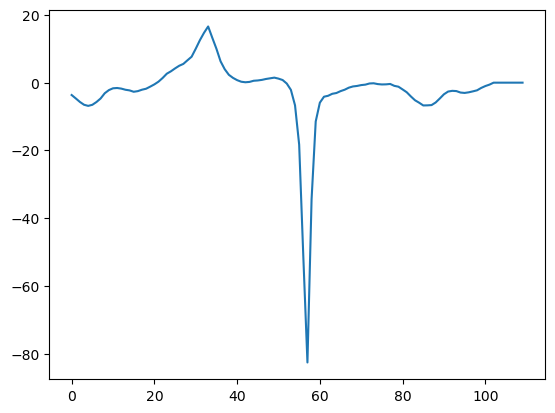

In [207]:
letters_curvature['ye'] = get_curvature(ye)
plt.plot(get_curvature(ye))

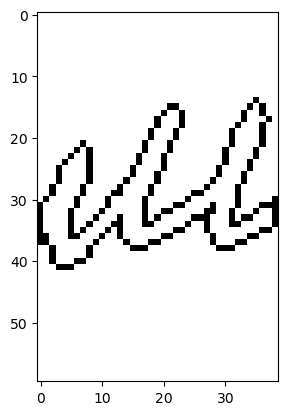

In [214]:
m = im_bin[90:150, 408:447]
plt.imshow(get_outers(m))
plt.gray()
plt.show()

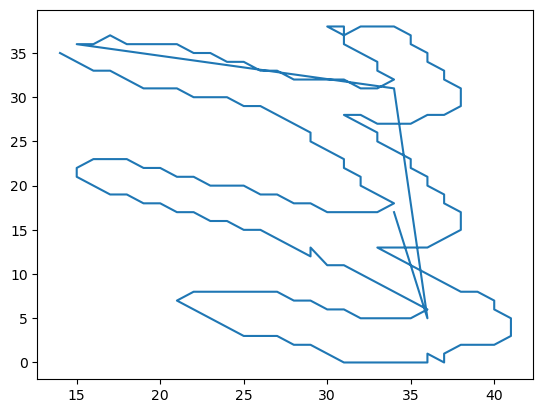

In [215]:
x, y = zip(*get_lines(m)[0])
plt.plot(x, y)

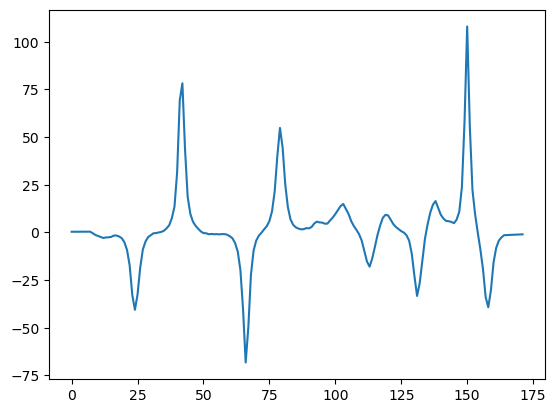

In [216]:
letters_curvature['m'] = get_curvature(m)
plt.plot(get_curvature(m))

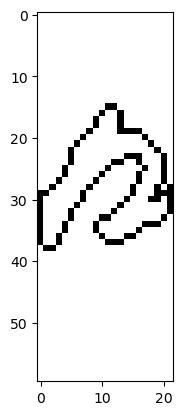

In [222]:
p = im_bin[90:150, 447:469]
plt.imshow(get_outers(p))
plt.gray()
plt.show()

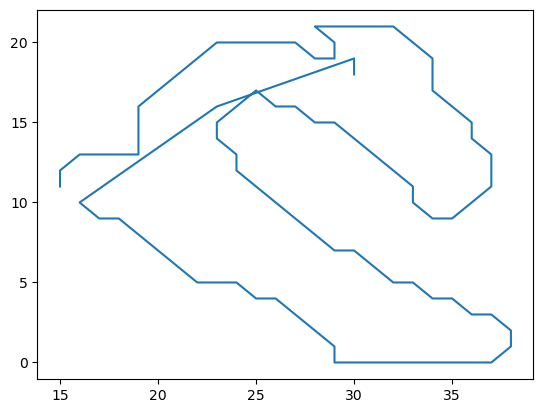

In [223]:
x, y = zip(*get_lines(p)[0])
plt.plot(x, y)

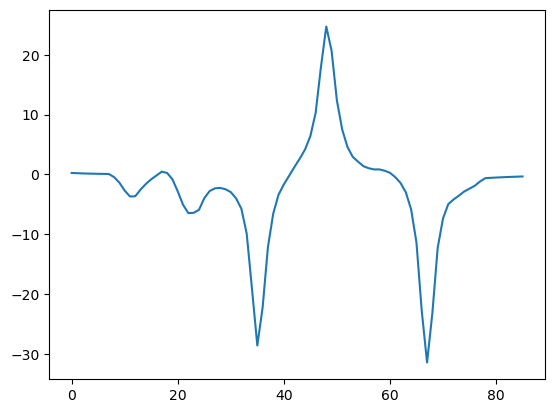

In [224]:
letters_curvature['p'] = get_curvature(p)
plt.plot(get_curvature(p))

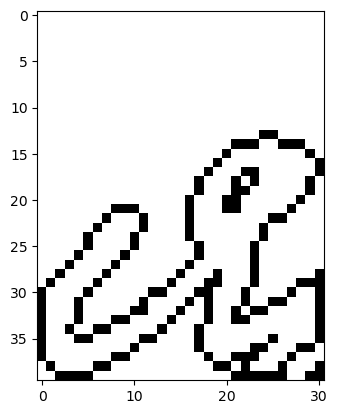

In [236]:
ya = im_bin[90:130, 492:523]
plt.imshow(get_outers(ya))
plt.gray()
plt.show()

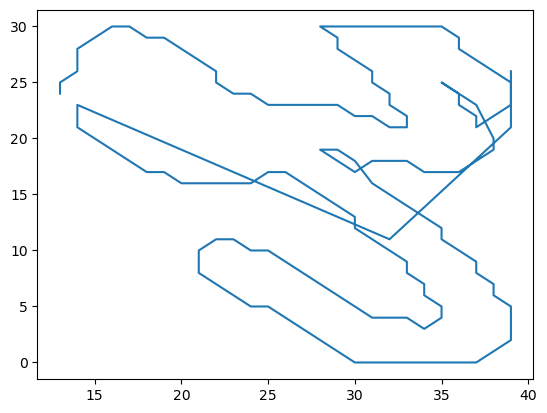

In [237]:
x, y = zip(*get_lines(ya)[0])
plt.plot(x, y)

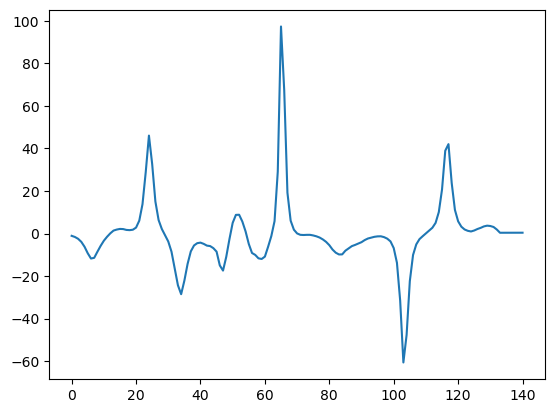

In [238]:
letters_curvature['ya'] = get_curvature(ya)
plt.plot(get_curvature(ya))